In [270]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Missing Values

In [271]:
df_data_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

There are 194,673 accidents reported and all of them have a Severity code which means there is no missing data.  However, some of the attributes which may be considered for projecting accidents, have some missing data, including ROADCOND and LIGHTCOND, which both are missing approximately 2.5%.  The missing values for Road Condition and Light Condition will be removed later before analysis.

The date and time parameters INCDATE does not have any missing data.

In [272]:
print('Missing values in ROADCOND:', df_data_8["ROADCOND"].isna().sum(),'\n'
    'Missing values in LIGHTCOND:', df_data_8["LIGHTCOND"].isna().sum(), '\n'
    'Missing values in INCDATE:', df_data_8["INCDATE"].isna().sum(),'\n'
    'Missing values in SEVERITYCODE:', df_data_8["SEVERITYCODE"].isna().sum())

Missing values in ROADCOND: 5012 
Missing values in LIGHTCOND: 5170 
Missing values in INCDATE: 0 
Missing values in SEVERITYCODE: 0


# Target Value is SEVERITYCODE

The Target Value of SEVERITYCODE indicates the value 1 if there is an accident with property damage and 2 if there is injury. Approximately 30% of the accidents on file are injury related.

In [312]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
df_data_8.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Accidents classified in each level of severity:
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


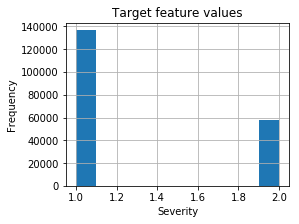

In [274]:
df_data_8['SEVERITYCODE'].hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df_data_8.SEVERITYCODE.value_counts())

Retain four Key Variables for the analysis.

In [276]:
df_an=df_data_8[['SEVERITYCODE', 'INCDATE','ROADCOND','LIGHTCOND']]

df_an.head()

,SEVERITYCODE,INCDATE,ROADCOND,LIGHTCOND
0,2,2013/03/27 00:00:00+00,Wet,Daylight
1,1,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On
2,1,2004/11/18 00:00:00+00,Dry,Daylight
3,1,2013/03/29 00:00:00+00,Dry,Daylight
4,2,2004/01/28 00:00:00+00,Wet,Daylight


### Transform Road Conditions and Light Conditions from Categorical Data to Numerical Data for Analysis

In [277]:
df_an['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [278]:
def RC_to_numeric(x):
    if x=='Dry':
        return 1
    if x=='Sand/Mud/Dirt':
        return 2
    if x=='Standing Water':
        return 3
    if x=='Unknown':
        return 3
    if x=='Other':
        return 3
    if x=='Wet':
        return 4
    if x=='Snow/Slush':
        return 5
    if x=='Ice':
        return 6
    if x=='Oil':
        return 6
df_an['RD_CAT'] = df_an['ROADCOND'].apply(RC_to_numeric)
df_an.head()
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SEVERITYCODE,INCDATE,ROADCOND,LIGHTCOND,RD_CAT
0,2,2013/03/27 00:00:00+00,Wet,Daylight,4.0
1,1,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On,4.0
2,1,2004/11/18 00:00:00+00,Dry,Daylight,1.0
3,1,2013/03/29 00:00:00+00,Dry,Daylight,1.0
4,2,2004/01/28 00:00:00+00,Wet,Daylight,4.0


In [279]:
df_an['RD_CAT'].value_counts()

1.0    124510
4.0     47474
3.0     15325
6.0      1273
5.0      1004
2.0        75
Name: RD_CAT, dtype: int64

In [280]:
df_an['LIGHTCOND'].value_counts()


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [281]:
def LC_to_numeric(x):
    if x=='Daylight':
        return 1
    if x=='Dusk':
        return 2
    if x=='Dawn':
        return 2
    if x=='Dark - Street Lights On':
        return 3
    if x=='Dark - No Street Lights':
        return 3
    if x=='Dark - Street Lights Off':
        return 3
    if x=='Dark - Unknown Lighting':
        return 3
    if x=='Other':
        return 2
    if x=='Unknown':
        return 2
df_an['LC_CAT'] = df_an['LIGHTCOND'].apply(LC_to_numeric)
df_an.head()
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SEVERITYCODE,INCDATE,ROADCOND,LIGHTCOND,RD_CAT,LC_CAT
0,2,2013/03/27 00:00:00+00,Wet,Daylight,4.0,1.0
1,1,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On,4.0,3.0
2,1,2004/11/18 00:00:00+00,Dry,Daylight,1.0,1.0
3,1,2013/03/29 00:00:00+00,Dry,Daylight,1.0,1.0
4,2,2004/01/28 00:00:00+00,Wet,Daylight,4.0,1.0


### Remove the rows with missing data in Road Conditions and/or Light Conditions

In [282]:
import pandas as pd
import numpy as np
df_an.dropna(subset=["RD_CAT","LC_CAT"],inplace=True)
df_an.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189443 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE    189443 non-null int64
INCDATE         189443 non-null object
ROADCOND        189443 non-null object
LIGHTCOND       189443 non-null object
RD_CAT          189443 non-null float64
LC_CAT          189443 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ MB


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [283]:

df_an['RD_CAT'] = pd.to_numeric(df_an['RD_CAT'], errors='coerce')
df_an['LC_CAT'] = pd.to_numeric(df_an['LC_CAT'], errors='coerce')
#df_an[["RD_CAT", "LC_CAT"]] = df_an[["RD_CAT", "LC_CAT"]].apply(pd.to_numeric, errors=coerce)
#df_an=df_an.astype({"RD_CAT":'int', "LC_CAT":'int'})
#df_an['RD_CAT'] = df_an['RD_CAT'].apply(np.int64) 
#pd.to_numeric(y, downcast='signed')
df_an = df_an.dropna(subset=['RD_CAT'])
df_an = df_an.dropna(subset=['LC_CAT'])

df_an['RD_CAT'] = df_an['RD_CAT'].astype(int)
df_an['LC_CAT'] = df_an['LC_CAT'].astype(int)

df_an.info()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189443 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE    189443 non-null int64
INCDATE         189443 non-null object
ROADCOND        189443 non-null object
LIGHTCOND       189443 non-null object
RD_CAT          189443 non-null int64
LC_CAT          189443 non-null int64
dtypes: int64(3), object(3)
memory usage: 10.1+ MB


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Review the Year and Month data

In [284]:
import datetime as dt

date=df_an

df_an['INCDATE'] = df_an['INCDATE'].apply(lambda x: pd.Timestamp(x))
df_an['year'] = df_an.INCDATE.dt.year
df_an['month'] = df_an.INCDATE.dt.month
df_month=date.copy()


Graph the yearly data to ensure that there is not a huge drop down or irreguality with older data that should be removed(drop in 2020 is because it is a partial year).

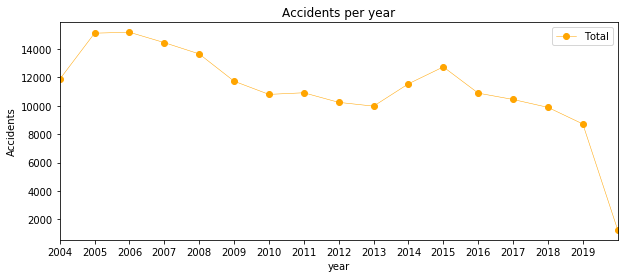

In [285]:
import pandas as pd
df_an.sort_values(by ='year', inplace=True)


yearly = df_an[['year', 'SEVERITYCODE']].groupby('year').count()
yearly['SEVERITYCODE'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2004,2020))
plt.xlim(2004,2020)
plt.ylabel('Accidents')
plt.legend()

Graph monthly data to view monthly variability.  If so, should be used in the forecasting model.

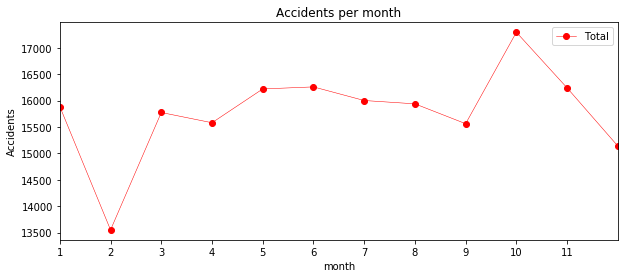

In [286]:
df_month.head()
df_month.sort_values(by ='month', inplace=True)
df_month.set_index(["month","SEVERITYCODE"]).count(level="month")

monthly = df_month[['month', 'SEVERITYCODE']].groupby('month').count()
monthly['SEVERITYCODE'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='red', label='Total')
plt.title('Accidents per month')
plt.xticks(range(1,12))
plt.xlim(1,12)
plt.ylabel('Accidents')
plt.legend()


Determine how balanced the cleaned data set is:

In [287]:
df_an["SEVERITYCODE"].value_counts()

1    132359
2     57084
Name: SEVERITYCODE, dtype: int64

The Dataset is very unbalanced as there are almost 3 times as many SEVERITY CODE 1'S as there are SEVERITY CODE 2's so the dataset will need to be balanced for sampling purposes.

### BALANCING THE DATASET

The target variable SEVERITYCODE is unbalanced (70% Type 1 and 30% Type 2)

We can fix this by downsampling the majority class.

Down-sample the majority class involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common method for doing this is resampling without replacement.

Here are the steps:

1.First, separate observations from each class into different DataFrames.
2.Next, resample the majority class without replacement, setting the number of samples to match that of the minority class.
3.Finally, combine the down-sampled majority class DataFrame with the original minority class DataFrame.


In [288]:
from sklearn.utils import resample

In [289]:
# Seperate majority and minority classes
df_an_maj = df_an[df_an.SEVERITYCODE==1]
df_an_min = df_an[df_an.SEVERITYCODE==2]

#Downsample majority class
df_an_maj_downsampled = resample(df_an_maj,
                                        replace=False,
                                        n_samples=57084,
                                        random_state=5)

# Combine minority class with downsampled majority class
df_an_bal = pd.concat([df_an_maj_downsampled, df_an_min])

# Display new class counts
df_an_bal.SEVERITYCODE.value_counts()

2    57084
1    57084
Name: SEVERITYCODE, dtype: int64

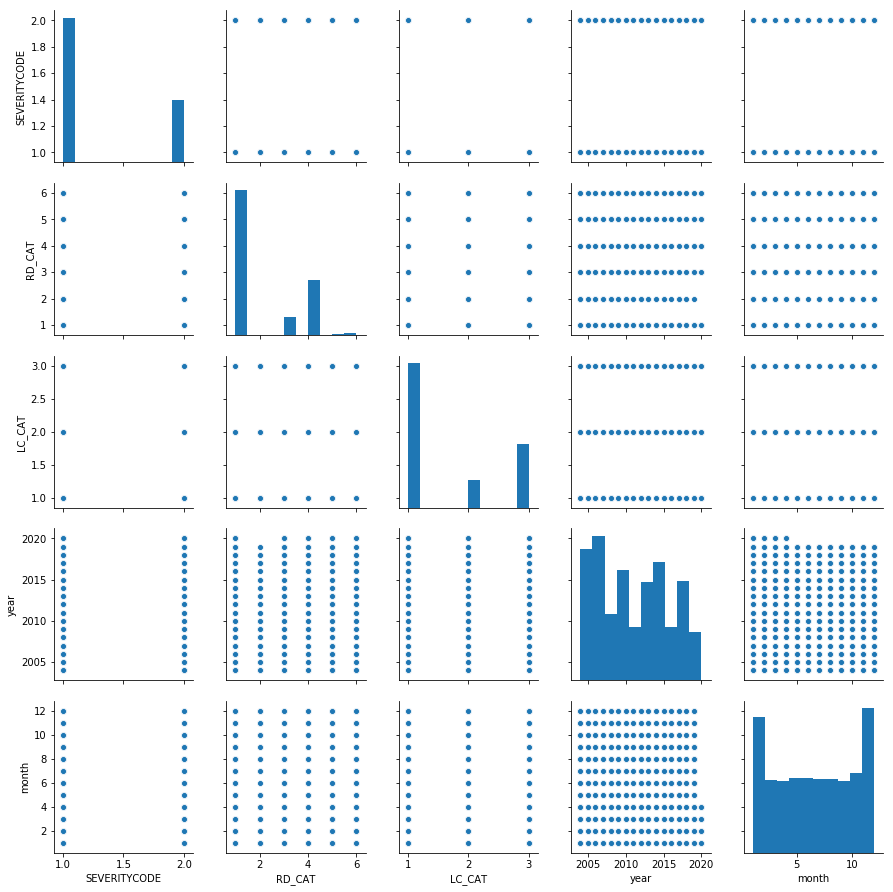

In [290]:
import seaborn as sns
sns.pairplot(df_an)

# DATA ANALYSIS AND METHODOLOGY

In [291]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline


In [292]:
#Look at Individual Correlations of the Variable to SEVERITYCODE
df_an.info()
df_an.corr(method='kendall')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189443 entries, 10499 to 186698
Data columns (total 8 columns):
SEVERITYCODE    189443 non-null int64
INCDATE         189443 non-null datetime64[ns, UTC]
ROADCOND        189443 non-null object
LIGHTCOND       189443 non-null object
RD_CAT          189443 non-null int64
LC_CAT          189443 non-null int64
year            189443 non-null int64
month           189443 non-null int64
dtypes: datetime64[ns, UTC](1), int64(5), object(2)
memory usage: 18.0+ MB


,SEVERITYCODE,RD_CAT,LC_CAT,year,month
SEVERITYCODE,1.000000,-0.035332,-0.060173,0.022860,0.003718
RD_CAT,-0.035332,1.000000,0.193966,-0.002866,0.014890
LC_CAT,-0.060173,0.193966,1.000000,-0.010254,0.039294
year,0.022860,-0.002866,-0.010254,1.000000,-0.003237
month,0.003718,0.014890,0.039294,-0.003237,1.000000


The individual correlations are not strong (close to 0) so will utilize the machine learning methods to forecast.

The data is now ready to be analyzed by the machine learning models.

We will use the following models (They are described below):

K-Nearest Neighbor (KNN)

Decision Tree

Random Forest Model

Logistic Regression

In [293]:
df_an_bal.head()

,SEVERITYCODE,INCDATE,ROADCOND,LIGHTCOND,RD_CAT,LC_CAT,year,month
78944,1,2009-06-24 00:00:00+00:00,Unknown,Unknown,3,2,2009,6
36880,1,2006-01-24 00:00:00+00:00,Dry,Daylight,1,1,2006,1
66016,1,2008-08-18 00:00:00+00:00,Wet,Daylight,4,1,2008,8
106853,1,2012-05-21 00:00:00+00:00,Wet,Daylight,4,1,2012,5
130666,1,2014-08-14 00:00:00+00:00,Dry,Dark - Street Lights On,1,3,2014,8


## Defining X and Y and Normalize the Dataset

In [294]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

X=np.asarray(df_an_bal[['RD_CAT', 'LC_CAT', 'month']])
X[0:5]
y=np.asarray(df_an_bal['SEVERITYCODE'])
y[0:5]

np.array(np.unique(y, return_counts=True)).T
y.shape


X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Train/Test Split

The analysis will use 30% of the data for testing and 70% for training.

In [295]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=4)

print('Train set:', X_train.shape,y_train.shape)
print('Test set:',X_test.shape, y_test.shape)



Train set: (79917, 3) (79917,)
Test set: (34251, 3) (34251,)


### Methodology

1) K-Nearest Neighbor (KNN)
KNN will help us predict the SEVERITYCODE of an outcome by finding the most similar data point within k distance.

2) Decision Tree
A decision tree model provides a layout of all possible outcomes so we can fully analyze the consequences of each decision. The decision tree observes all possible outcomes of different weather conditions. The Randon Forest model is also used to try and improve the accuracy.

3) Logistic Regression
Because our dataset only provides us with two SEVERITYCODE outcomes, the model will only predict one of those two classes(binary)therefore -  logistic regression.



### K-Nearest Neighbors (KNN)

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score, classification_report, precision_score, recall_score, accuracy_score

#Search for the optimum K

tt = X_train.shape[0]
tv = X_test.shape[0]
X_train[int(tt*0.5):].shape[0], X_test[int(tv*0.5):].shape[0]

ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train[int(tt*0.5):],y_train[int(tt*0.5):])
    KyHat = neigh.predict(X_test[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(y_test[int(tv*0.5):],KyHat)
    std_acc[n-1] = np.std(KyHat==y_test[int(tv*0.5):])/np.sqrt(KyHat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))




Best performing K is 13 with an accuracy of 0.5390050216045779


Build the KNN Model

In [297]:


from sklearn.neighbors import KNeighborsClassifier
k=13



In [298]:
#Train Model and Predict

In [299]:
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [300]:
KyHat = neigh.predict(X_test)
print(KyHat[0:5])
print(y_test[0:5])


[2 1 1 1 1]
[1 1 2 1 1]


### Decision Tree Analysis

In [301]:
#Building the Decision Tree

from sklearn.tree import DecisionTreeClassifier
AccTree = DecisionTreeClassifier(criterion="entropy",max_depth=6)
AccTree
AccTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [302]:
DTyHat=AccTree.predict(X_test)
print(y_test[0:5])
print(DTyHat[0:5])

[1 1 2 1 1]
[2 2 1 2 1]


#### Random Forest Model

A random forest model may improve the accuracy as it fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of decision trees is specified with the n_estimators parameter. An upside of this algorithm is its feature_importances_ atribut, it returns the impurity based feature importance.

In [303]:
from sklearn.ensemble import RandomForestClassifier
#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve


In [305]:
#Evaluation

model_rf = RandomForestClassifier(n_estimators=10, max_features=3, max_depth =6,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
RFyHat = model_rf.predict(X_test)
jaccard_rf = jaccard_similarity_score(y_test,RFyHat)
c_rf = classification_report(y_test,RFyHat)
prec_rf = precision_score(y_test, RFyHat)
rec_rf = recall_score(y_test, RFyHat)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Jaccard : 0.5559545706694695 
               precision    recall  f1-score   support

           1       0.59      0.35      0.44     17139
           2       0.54      0.76      0.63     17112

   micro avg       0.56      0.56      0.56     34251
   macro avg       0.57      0.56      0.54     34251
weighted avg       0.57      0.56      0.54     34251



### Logistic Regression


In [306]:
#Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


LR=LogisticRegression(C=10,solver='liblinear').fit(X_train,y_train)
LR
print('Coefficients', LR.coef_)
print('Intercept', LR.intercept_)

Coefficients [[-0.0529887  -0.10601482  0.00974021]]
Intercept [0.00041173]


In [307]:
#Train Model and Predict

LRyHat=LR.predict(X_test)
#np.array(np.unique(LRyHat, return_counts=True)).T
print(LRyHat[0:5])
print(y_test[0:5])

[2 2 1 2 1]
[1 1 2 1 1]


In [308]:
LRyHat_prob=LR.predict_proba(X_test)
LRyHat_prob

array([[0.47408492, 0.52591508],
       [0.47337272, 0.52662728],
       [0.54720674, 0.45279326],
       ...,
       [0.49791765, 0.50208235],
       [0.47194865, 0.52805135],
       [0.56446127, 0.43553873]])

# Results and Evaluation

Accuracy Check of the models


### KNN

In [309]:

jaccard_knn = jaccard_similarity_score(y_test,KyHat)
c_knn = classification_report(y_test,KyHat)
prec_knn = precision_score(y_test, KyHat)
rec_knn = recall_score(y_test, KyHat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Jaccard : 0.5259700446702286 
               precision    recall  f1-score   support

           1       0.52      0.58      0.55     17139
           2       0.53      0.47      0.50     17112

   micro avg       0.53      0.53      0.53     34251
   macro avg       0.53      0.53      0.52     34251
weighted avg       0.53      0.53      0.52     34251



### Decision Tree

In [310]:
jaccard_rf = jaccard_similarity_score(y_test,DTyHat)
c_rf = classification_report(y_test,DTyHat)
prec_rf = precision_score(y_test, DTyHat)
rec_rf = recall_score(y_test, DTyHat)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Jaccard : 0.5556042159353012 
               precision    recall  f1-score   support

           1       0.59      0.35      0.44     17139
           2       0.54      0.76      0.63     17112

   micro avg       0.56      0.56      0.56     34251
   macro avg       0.57      0.56      0.54     34251
weighted avg       0.57      0.56      0.54     34251



### Logistic Regression

In [ ]:
r2_score(LRyHat, y_test)

The R2 is quite high which shows positive results, however this number includes how accurately SEVERITYCODE 1 is estimated and therefore is not the best number to asses the ability of the Logistic Regression to forecast only SEVERITYCODE 2.

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,LRyHat_prob)

In [311]:
jaccard_lr = jaccard_similarity_score(y_test,LRyHat)
c_lr = classification_report(y_test,LRyHat)
prec_lr = precision_score(y_test, LRyHat)
rec_lr = recall_score(y_test, LRyHat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Jaccard : 0.5377069282648682 
               precision    recall  f1-score   support

           1       0.54      0.48      0.51     17139
           2       0.53      0.59      0.56     17112

   micro avg       0.54      0.54      0.54     34251
   macro avg       0.54      0.54      0.54     34251
weighted avg       0.54      0.54      0.54     34251



# RESULTS

Because we are concerned with predicting the serious injuries, we will look at the F scores for the 2 value of SEVERITYCODE and the Recall Score for the 2 value of SEVERITYCODE.  The Recall Score is particularly important because it provides the number of True positives divided by the Total Number that belong to the Positive Group. The Jaccard score is for the accuracy of the combined 1 and 2 SEVERITYCODES.  Therefore a strong prediction of the 1 code would influence to Jaccard Score higher when in fact we only care about the prediction of the 2 code.

The forecasting results are as follows for SEVERITYCODE 2:


                              F1 Score      RECALL
            KNN                 .50           .47
            DECISION TREE       .63           .76
            RANDOM FOREST       .63           .76
            LOGISTIC REGRESSION .56           .59
            





The Ransom Foreset (Recall .75 and F1 score .64) is slightly better than the Decision Tree (Recall .75 and F1 Score .63), however both are much better KNN and Logistic Regression with very low Recall scores (.57 and .6 respectively) and much lower F1 scores as well(.55 and .57 respecticvely)

# DISCUSSION

The goal of this notebook was to determine if we could calculate a forecast for severe accidents in Seattle based on historical data.  Much of the information was categorical data that was of type 'object'. This is not a data type that can be utilized in forecasting algorithms, so label encoding was used to create new classes that were of numerical data type.

Then there was (a small amount of missing data) in some of the key parameters that was removed.  Finally, the dataset was very imbalanced as class 1 was nearly three times larger than class 2 of the target variable SEVERITYCODE. The solution to this was downsampling the majority class with sklearn's resample tool to match the minority class exactly with 57084 values each.

The cleaned data was then fed through three ML models; K-Nearest Neighbor, Decision Tree(including Random Forest Model) and Logistic Regression. 

Evaluation metrics used to test the accuracy of our models were primarily F1 Score and Recall to determine the best precision for SEVERITYCODE equal to 2 (a severe injury).



# CONCLUSION

This study analyzed the relationship between the severity of an accident and some characteristics which describe the situation that involved the accident including road conditions,lighting and month.  These features all contribute to potential for a severe accident. The analysis compared the results of 4 different classification models to predict whether or not an accident would have a high probability of being severe.  These models have multiple applications in real life such as predicting when potential severe accidents might occur using time of year, road conditions and light conditions and from there measures can be enacted quickly by police/ambulance etc.  In addition, people could use the information to determine if they are at higher risk for a severe accident before they leave the house and make adjustments from there.